## Vectorial Maps
### Santiago Metropolitan Region
By: Marcelo Rovai @20Nov18

### Dataset: INE
#### Map Gallery / Censo 2017 (Definitive Result)
"Region Metroplitana de Chile (R13)" <br>
http://www.ine.cl/herramientas/galeria-de-mapas/censo
<p>Split files related with "Comuna"</p>

- Comuna.cpg
- Comuna.shp
- Comuna.dbf 
- Comuna.shp.xml
- Comuna.prj 
- Comuna.shx
- Comuna.sbn 
- Comuna.sbx

### To Install pyshp: 
`pip install pyshp`

In [1]:
!pip install pyshp

     |████████████████████████████████| 219 kB 5.0 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=d146cb9492061a17c6b8d1bd956e4bf71e48e4ebb6cd9fbee2cb3bc6a3286a3f
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [18]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline 

In [19]:
shp_path = "/content/2021-09-27.shp"
sf = shp.Reader(shp_path)

In [20]:
!ls 

2021-09-27.cpg	2021-09-27.prj	2021-09-27.shx
2021-09-27.dbf	2021-09-27.shp	sample_data


In [21]:
print ('number of shapes imported:',len(sf.shapes()))

number of shapes imported: 345


In [22]:
sf.records()

[Record #0: [1, 'Landing Zone'],
 Record #1: [2, 'Cart Traffic'],
 Record #2: [3, 'Water Stress'],
 Record #3: [4, 'Water Stress'],
 Record #4: [5, 'Dry Elevated'],
 Record #5: [6, 'Dry Elevated'],
 Record #6: [7, 'Water Stress'],
 Record #7: [8, 'Foot Traffic'],
 Record #8: [9, 'Foot Traffic'],
 Record #9: [10, 'Water Stress'],
 Record #10: [11, 'Water Stress'],
 Record #11: [12, 'Healthy'],
 Record #12: [13, 'Healthy'],
 Record #13: [14, 'Foot Traffic'],
 Record #14: [15, 'Healthy'],
 Record #15: [16, 'Landing Zone'],
 Record #16: [17, 'Foot Traffic'],
 Record #17: [18, 'Dry Elevated'],
 Record #18: [19, 'Water Stress'],
 Record #19: [20, 'Dry Elevated'],
 Record #20: [21, 'Foot Traffic'],
 Record #21: [22, 'Others'],
 Record #22: [23, 'Water Stress'],
 Record #23: [24, 'Landing Zone'],
 Record #24: [25, 'Water Stress'],
 Record #25: [26, 'Water Stress'],
 Record #26: [27, 'Water Stress'],
 Record #27: [28, 'Dry Elevated'],
 Record #28: [29, 'Landing Zone'],
 Record #29: [30, 'Foot t

In [52]:
sf.records()[0][1]

'Landing Zone'

In [24]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' column holding
    the geometry information. This uses the pyshp package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [25]:
df = read_shapefile(sf)
df.shape

(345, 3)

In [26]:
df.sample(5)

,id,Text,coords
287,288,Water Stress,"[(151.2917536597246, -32.785130362474035), (15..."
24,25,Water Stress,"[(151.29578686107337, -32.778045199299804), (1..."
333,334,Dry Elevated,"[(151.2917304656414, -32.788557971588624), (15..."
316,317,Foot Traffic,"[(151.2903173519862, -32.786996354471846), (15..."
189,190,Healthy,"[(151.29519798410809, -32.78236139003109), (15..."


In [32]:
df = df.rename({'Text': 'label'}, axis=1)

In [33]:
df[df.label == 'Landing Zone']

,id,label,coords
0,1,Landing Zone,"[(151.29034697601594, -32.77601168051737), (15..."
15,16,Landing Zone,"[(151.2928782484808, -32.776326575782086), (15..."
23,24,Landing Zone,"[(151.29261927016407, -32.776477101233375), (1..."
28,29,Landing Zone,"[(151.2960752991815, -32.77778595891427), (151..."
43,44,Landing Zone,"[(151.29490581688387, -32.77950994160853), (15..."
44,45,Landing Zone,"[(151.29520133322782, -32.77961257602738), (15..."
45,46,Landing Zone,"[(151.2949376689449, -32.77989393589974), (151..."
59,60,Landing Zone,"[(151.2952348215873, -32.77982090238586), (151..."
60,61,Landing Zone,"[(151.29529176113513, -32.77972772858028), (15..."
61,62,Landing Zone,"[(151.2952368921163, -32.779783632863634), (15..."


In [34]:
df.label

0      Landing Zone
1      Cart Traffic
2      Water Stress
3      Water Stress
4      Dry Elevated
           ...     
340    Foot Traffic
341         Healthy
342    Foot Traffic
343    Water Stress
344    Cart Traffic
Name: label, Length: 345, dtype: object

In [35]:
Labels = ['Water Stress', 'Dry Elevated', 'Waterlogged', 'Foot Traffic', 'Cart Traffic', 'Landing Zone', 'Healthy', 'Others']
lab_count = [0]*len(Labels)
for i in range (len(Labels)):
  lab_count[i] = len(df[df.label == Labels[i]].index)
lab_count

[110, 44, 17, 60, 26, 45, 34, 8]

In [58]:
import math
lab_percentage = ((lab_count/np.sum(lab_count))*100).astype(int)
for i in range (len(Labels)):
  print(Labels[i]," : ",lab_percentage[i])
print(lab_percentage)

Water Stress  :  31
Dry Elevated  :  12
Waterlogged  :  4
Foot Traffic  :  17
Cart Traffic  :  7
Landing Zone  :  13
Healthy  :  9
Others  :  2
[31 12  4 17  7 13  9  2]


In [72]:
newList = []
count = 0
for i in Labels:
  newList.append(i + " = " + str(lab_percentage[count]) + "%")
  count += 1

print(newList) 

['Water Stress = 31%', 'Dry Elevated = 12%', 'Waterlogged = 4%', 'Foot Traffic = 17%', 'Cart Traffic = 7%', 'Landing Zone = 13%', 'Healthy = 9%', 'Others = 2%']


([<matplotlib.patches.Wedge at 0x7fc7ad331990>,
 [Text(0.590087862315945, 0.9283298523409653, 'Water Stress = 31%'),
  Text(-0.8192494201977278, 0.7340506709387895, 'Dry Elevated = 12%'),
  Text(-1.0834818029903366, 0.18991361875550053, 'Waterlogged = 4%'),
  Text(-0.9492617017434369, -0.555789727867612, 'Foot Traffic = 17%'),
  Text(-0.2782267258446015, -1.0642320654001143, 'Cart Traffic = 7%'),
  Text(0.420951775601599, -1.0162674857624154, 'Landing Zone = 13%'),
  Text(0.9872994037620265, -0.4850153475212378, 'Healthy = 9%'),
  Text(1.0970655139311971, -0.08029482014973753, 'Others = 2%')])

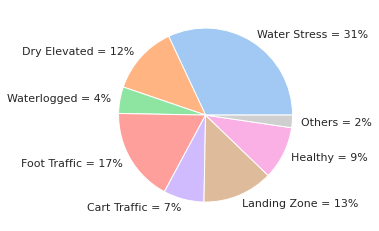

In [73]:
plt.pie(lab_count,labels=newList)
#plt.legend(title = "Label Summary:")

In [37]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]

    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

(151.2908490939501, -32.77622129413211)

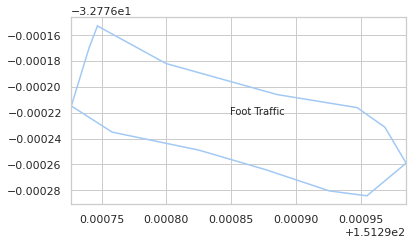

In [38]:
# Plot Comuna
Label = 'Foot Traffic'
lab_id = df[df.label == Label].index[1]
plot_shape(lab_id, Label)

In [39]:
lab_id

8

(151.29508770609434, -32.77951326623442)

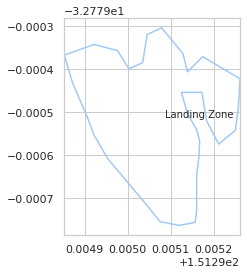

In [40]:
# Plot Comuna
Label = 'Landing Zone'
lab_id = df[df.label == Label].index[4]
plot_shape(lab_id, Label)

In [41]:
lab_id

43

In [42]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map withlim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim) 

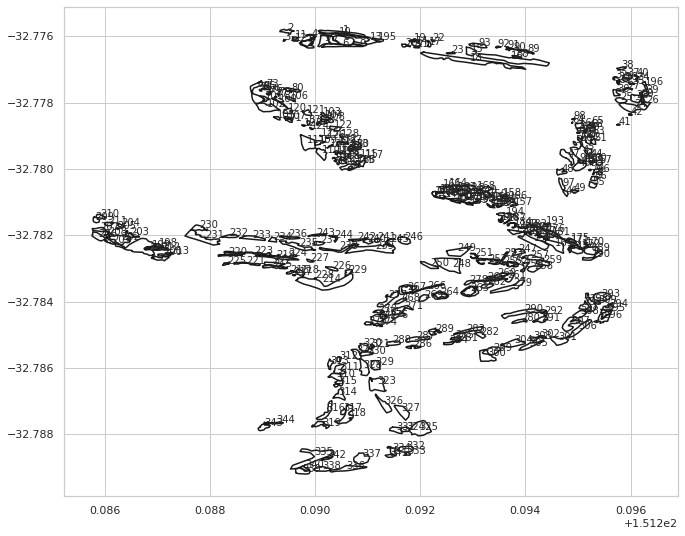

In [43]:
plot_map(sf)

In [44]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)

    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim) 

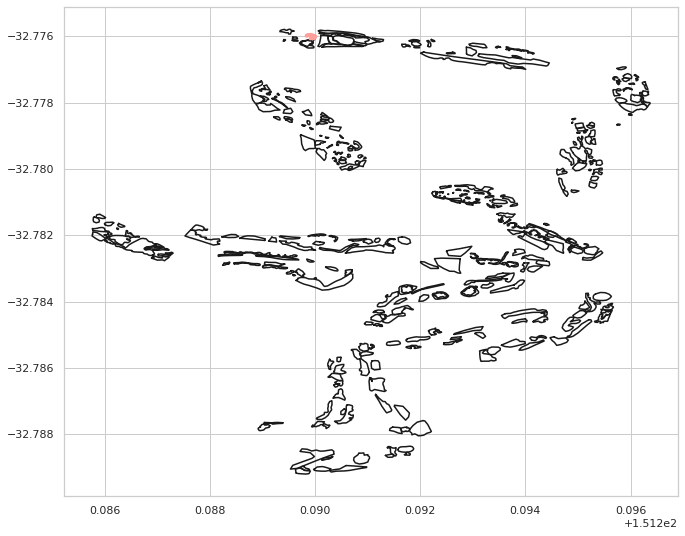

In [45]:
plot_map2(4, sf)

In [46]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)

    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim) 

<Figure size 792x648 with 0 Axes>

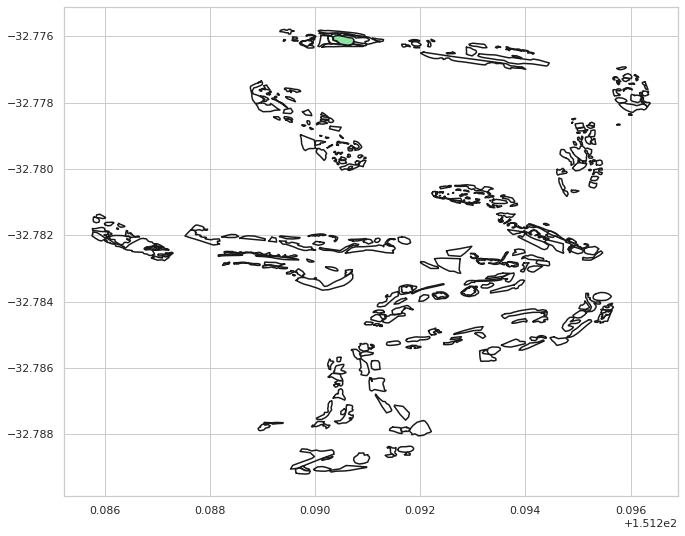

In [47]:
plot_map_fill(0, sf, color='g')

In [48]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
    #fig.savefig(title)

<Figure size 792x648 with 0 Axes>

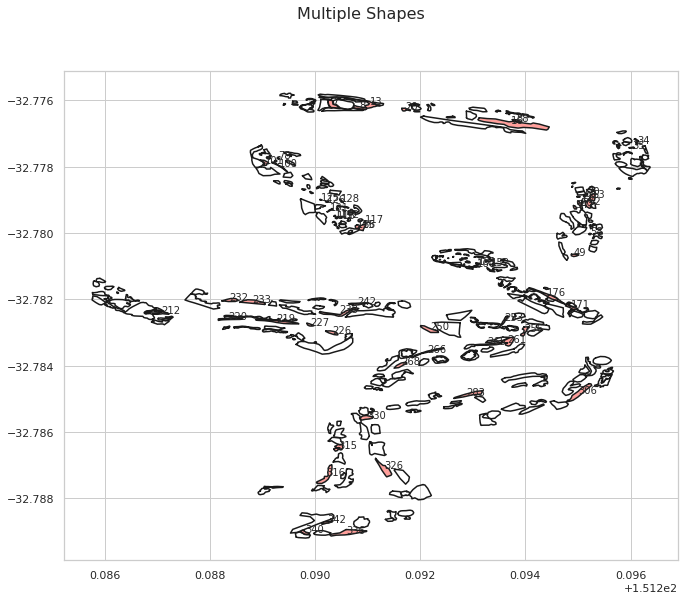

In [49]:
Label = 'Foot Traffic'
lab_id = df[df.label == Label].index
plot_map_fill_multiples_ids("Multiple Shapes", lab_id, sf, color = 'r')